In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
from google.colab import files
uploaded=files.upload()

Saving advertising_sales_data.xlsx to advertising_sales_data.xlsx


In [6]:
dataset=pd.read_excel('advertising_sales_data.xlsx')

In [7]:
x=dataset.iloc[:,[1,2,3]]
y=dataset.iloc[:,[4]]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1)

In [9]:
from sklearn.impute import SimpleImputer

#Our data contains missing values, So we fill in those values using the mean of other values.

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

The data pre-processing stage is now complete.

In [10]:
regressor=LinearRegression()
regressor.fit(x_train_imputed,y_train)

LinearRegression()

In [11]:
#Q-1 To find the average of tv expenditure.
#You can't use an integer to point at your column. You have to use the column's name.
tv_spent=dataset['TV'].mean()
print(tv_spent)

147.0425


In [12]:
# Q-2.  What is the correlation between radio advertising expenditure and product sales?
correlation_matrix= dataset[['Radio','Sales']].corr()
print(correlation_matrix)

#An index close to -/+1 suggests that correlation is high. An index of 0 suggests no correlation at all.

          Radio     Sales
Radio  1.000000  0.349728
Sales  0.349728  1.000000


In [13]:
#Q-3.	Which advertising medium has the highest impact on sales based on the dataset?
# Basically we have to find the variable with highest correlation with sales.
corr_matrix= dataset[['TV','Radio','Newspaper','Sales']].corr()
print(corr_matrix)

#TV expenditure has the highest correlation with sales.

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.056648  0.901208
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.056648  0.354987   1.000000  0.157960
Sales      0.901208  0.349728   0.157960  1.000000


In [14]:
#Q-4 Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

#Since this is a multi linear regression model with 3 independent variables, the plot (between independent and dependent variable) wouldn't be a simple line, but rather a hyperplane. So visualising ['TV,'Radio','Newspaper'] against 'Sales' isn't directly possible.

#So we plot the scattered points of the actual vs predicted values of independent variable and compare it with the line y=x(most ideal). If our data points lie on the y=x line, it suggests that our predicted values are very close to the actual values.

#To plot this ideal line we have to use the max and min extent of the values in our predicted and actual data. then join these two points to get a straight line

#We do this comparison for the training set(y_pred vs y_train) and testing set(y_pred vs y_test)


y_pred=regressor.predict(x_train_imputed)

min_val = min(y_train.min().min(), y_pred.min())
max_val = max(y_train.max().max(), y_pred.max())

plt.scatter(y_train,y_pred,color='red',alpha=0.6,label='Actual vs Predicted')
plt.plot([min_val, max_val], [min_val, max_val],color='blue',alpha=0.6,
     linewidth=1,label='Ideal Case (y=x)')

plt.xlabel('Actual training Data')
plt.ylabel('Predicted data')
plt.title('Actual vs Predicted Sales on Training Set')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [15]:
y_pred1=regressor.predict(x_test_imputed)

min_val = min(y_test.min().min(), y_pred1.min())
max_val = max(y_test.max().max(), y_pred1.max())

plt.scatter(y_test,y_pred1,color='green',alpha=0.6,label='Actual vs Predicted')

plt.plot([min_val, max_val], [min_val, max_val],color='blue',alpha=0.6,
     linewidth=1,label='Ideal Case (y=x)')

plt.xlabel('Actual testing Data')
plt.ylabel('Predicted data')
plt.title('Actual vs Predicted Sales On Testing Set')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [16]:
#Q-5	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

#To solve this first we need the equation of y(sales) vs TV(x1),Radio(x2), Newspaper(x3).

# y=A0+ A1x2+ A2x2+ A3x3 , where A0,A1,A2,A3 are some constants.

Intercept= regressor.intercept_
Coefficients= regressor.coef_
print(Intercept)
print(Coefficients)

[4.6379987]
[[ 0.05507894  0.10310392 -0.00091626]]


Let y denote sales, x1 denote TV Expenditure, x2 denote Radio expenditure and x3 denote Newspaper expenditure.

Then we know that y= 4.6379987+ 0.05507894(x1)+ 0.10310392(x2)- 0.00091626(x3).

In [17]:
#Now we fit this data and predict the corrosponding value of y using regressor.predict

arr=np.array([[200,40,50]])
predicted_result=regressor.predict(arr)
print("The value of sales for the given data is $ ", predicted_result)

The value of sales for the given data is $  [[19.73213044]]


Q-6 How does the performance of the linear regression model change when the dataset is normalized?

In [18]:
#For this we have to compare performance matrics (like MSE and R^2 score) for the data before and after normalisation.

#Before-normalisation data. This is the data we had been dealing with until now in the regressor instance.

# Performance Metrics
from sklearn.metrics import r2_score, mean_squared_error

# Calculate predictions on the imputed test data
y_pred1 = regressor.predict(x_test_imputed)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred1)
print("R-squared score (before normalization): ",r2)

# Calculate Mean Squared Error(MSE)
mse = mean_squared_error(y_test, y_pred1)
print(f"Mean Squared Error (before normalization): {mse}")

R-squared score (before normalization):  0.8747281125488686
Mean Squared Error (before normalization): 2.4092281565108626


In [19]:
#After Normalisation

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler. Fit the training set in StandardScaler. And normalise the values of input x and output y.
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_Train_Scaled= scaler_X.fit_transform(x_train_imputed)
Y_Train_Scaled= scaler_Y.fit_transform(y_train.values.reshape(-1,1))

#Transform the Test set. But don't fit the test set in the StandardScaler.
X_Test_Scaled= scaler_X.transform(x_test_imputed)
Y_Test_Scaled= scaler_Y.transform(y_test.values.reshape(-1,1))


# Fit the scaled data to the regressor

regr_normal=LinearRegression()
regr_normal=regressor.fit(X_Train_Scaled, Y_Train_Scaled)
y_pred_scaled=regr_normal.predict(X_Test_Scaled)

#R^2 Score
r2_normalised=r2_score(Y_Test_Scaled,y_pred_scaled)
print("R-squared score (after normalization): ",r2_normalised)

#MSE
mse_normalised=mean_squared_error(Y_Test_Scaled,y_pred_scaled)
print(f"Mean Squared Error (after normalization): {mse_normalised}")

R-squared score (after normalization):  0.8747281125488685
Mean Squared Error (after normalization): 0.08160374469527203


For a good predicting model, the value of MSE should be close to 0 and value of R^2 should be close to 1. After normalisation, there is negligible change in R^2 values. However, the MSE value decreases significantly. Hence, it is safe to assume that our model becomes slightly better at predicting values after normalisation.


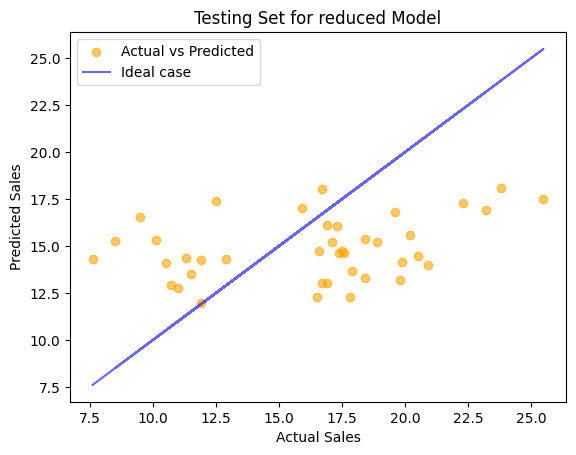

In [20]:
#Q-7 What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

#We will compare our previous model un-normalised values with the new un-normalised values of our reduced model to analuyse the impact.

a=dataset.iloc[:,[2,3]]
b=dataset.iloc[:,4]

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2, random_state=1)

a_train_imputed = imputer.fit_transform(a_train)
a_test_imputed = imputer.transform(a_test)

regr_reduced=LinearRegression()
regr_reduced.fit(a_train_imputed,b_train)
b_pred=regr_reduced.predict(a_test_imputed)

plt.scatter(b_test,b_pred,color='orange',alpha=0.6,label='Actual vs Predicted')
plt.plot(b_test,b_test,color='blue',alpha=0.6,label='Ideal case')
plt.title('Testing Set for reduced Model')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

In [21]:
# Calculate predictions using the imputed test data
b_pred=regr_reduced.predict(a_test_imputed)

r2_reduced=r2_score(b_test,b_pred)
mse_reduced=mean_squared_error(b_test,b_pred)

print(f"R-squared score of reduced model: {r2_reduced}")
print(f"Mean Squared Error of reduced model: {mse_reduced}")

R-squared score of reduced model: 0.007760758818524227
Mean Squared Error of reduced model: 19.08273888490688


It is clear from the plot and the R^2 and MSE values that the precision of the model has decreased significantly after removing the 'TV' column, suggesting a strong dependence of the 'Sales' on 'TV' expenditure.

#if we fit our testing set on Standardscaler and imputer, then we risk encountering 'Data Leakage'.


#Now we download all the necessary plots and graphs to use in the PowerPoint Presentation.

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Q6: Model Performance Comparison (Before vs. After Normalization)', fontsize=16, y=1.02)

# Calculate RMSE
# rmse_before = np.sqrt(mse)
# rmse_after = np.sqrt(mse_normalised)

# --- Subplot 1: Before Normalization ---
ax1 = axes[0]
sns.scatterplot(x=y_test.squeeze(), y=y_pred1.squeeze(), ax=ax1, color='darkblue', alpha=0.7)

# Add the ideal prediction line
# Explicitly get values from pandas Series/DataFrame before finding min/max
min_val = min(y_test.min().min(), y_pred1.min()) # Use .min().min() for DataFrame
max_val = max(y_test.max().max(), y_pred1.max()) # Use .max().max() for DataFrame

ax1.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

ax1.set_title(f'1. Before Normalization (Original Units)', fontsize=13)
ax1.set_xlabel('Actual Sales (Units)')
ax1.set_ylabel('Predicted Sales (Units)')
ax1.text(0.05, 0.95, f'$R^2$: {r2:.4f}\nMSE: {mse:.2f}',
         transform=ax1.transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.6))
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend()

# --- Subplot 2: After Normalization (Predictions Inverse-Transformed) ---
ax2 = axes[1]
# Inverse transform the scaled predictions for comparison in original units
y_pred_unscaled = scaler_Y.inverse_transform(y_pred_scaled)
sns.scatterplot(x=y_test.squeeze(), y=y_pred_unscaled.squeeze(), ax=ax2, color='darkgreen', alpha=0.7)

# Add the ideal prediction line (using the same min/max range)
min_val_scaled = min(y_test.min().min(), y_pred_unscaled.min()) # Use .min().min() for DataFrame
max_val_scaled = max(y_test.max().max(), y_pred_unscaled.max()) # Use .max().max() for DataFrame

ax2.plot([min_val_scaled, max_val_scaled], [min_val_scaled, max_val_scaled], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

ax2.set_title(f'2. After Normalization (Inverse-Transformed)', fontsize=13)
ax2.set_xlabel('Actual Sales (Units)')
ax2.set_ylabel('Predicted Sales (Units)')
ax2.text(0.05, 0.95, f'$R^2$: {r2_normalised:.4f}\nMSE: {mse_normalised:.2f}',
         transform=ax2.transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.6))
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('Normalization_Comparison.png')
plt.close()


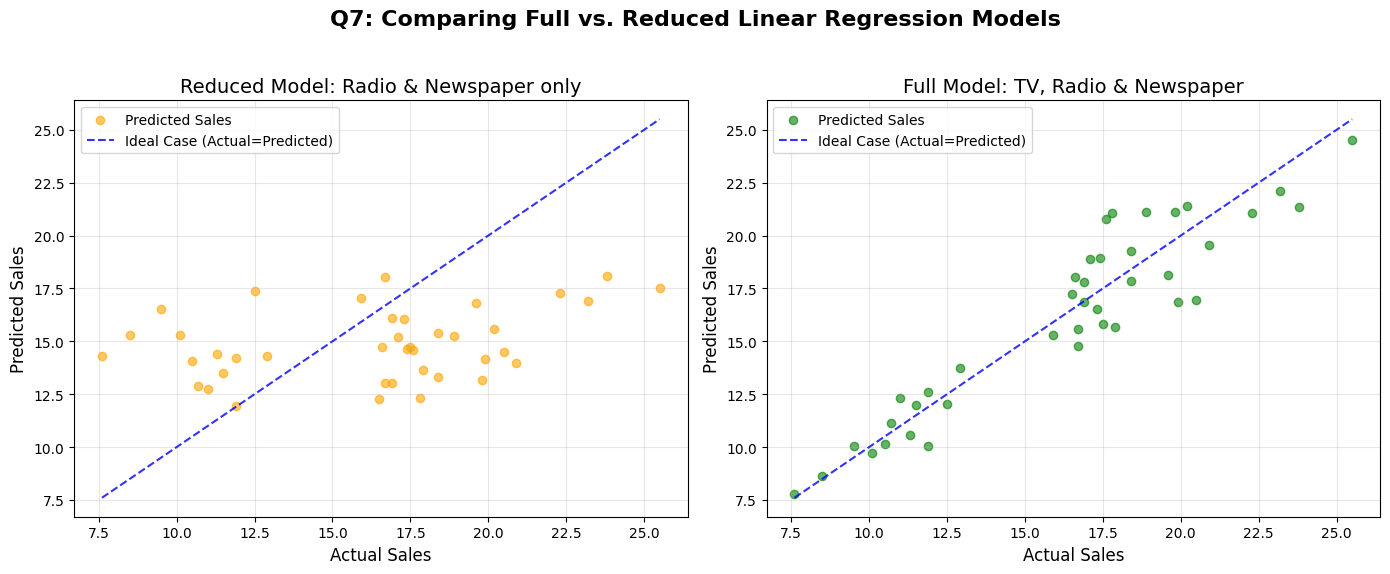

In [23]:
#4. Plotting the Subplots

plt.figure(figsize=(14, 6)) # Create a figure wide enough for two subplots

# Subplot 1: Reduced Model (Radio, Newspaper) ---
plt.subplot(1, 2, 1) # (rows, columns, plot_number)
plt.scatter(b_test, b_pred, color='orange', alpha=0.6, label='Predicted Sales')
# Plot the ideal line using the actual test data min/max for clean visualization
min_val_reduced = min(b_test.min(), b_pred.min())
max_val_reduced = max(b_test.max(), b_pred.max())
plt.plot([min_val_reduced, max_val_reduced], [min_val_reduced, max_val_reduced], color='blue', alpha=0.8, linestyle='--', label='Ideal Case (Actual=Predicted)')

plt.title('Reduced Model: Radio & Newspaper only', fontsize=14)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 2: Full Model (TV, Radio, Newspaper) ---
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred1, color='green', alpha=0.6, label='Predicted Sales')
# Plot the ideal line using the actual test data min/max for clean visualization
min_val_full = min(y_test.min().min(), y_pred1.min())
max_val_full = max(y_test.max().max(), y_pred1.max())
plt.plot([min_val_full, max_val_full], [min_val_full, max_val_full], color='blue', alpha=0.8, linestyle='--', label='Ideal Case (Actual=Predicted)')

plt.title('Full Model: TV, Radio & Newspaper', fontsize=14)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Q7: Comparing Full vs. Reduced Linear Regression Models', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.savefig('Model_Comparison.png') # Save the image for your presentation
plt.show()

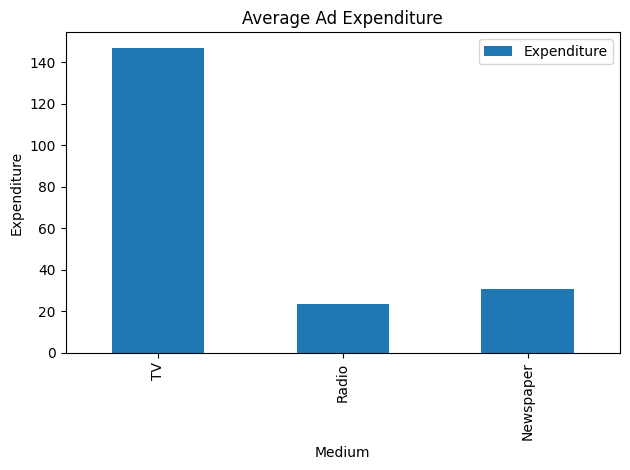

In [42]:
#To plot the average expenditure for tv, radio and newspaper
data_mean={
    'TV':dataset['TV'].mean(),
    'Radio':dataset['Radio'].mean(),
    'Newspaper':dataset['Newspaper'].mean()
}
dset_mean=pd.DataFrame(list(data_mean.items()), columns=['Medium','Expenditure'])

dset_mean.plot(x='Medium', y='Expenditure', kind='bar')
plt.title('Average Ad Expenditure')
plt.ylabel('Expenditure')
plt.tight_layout()
plt.show()

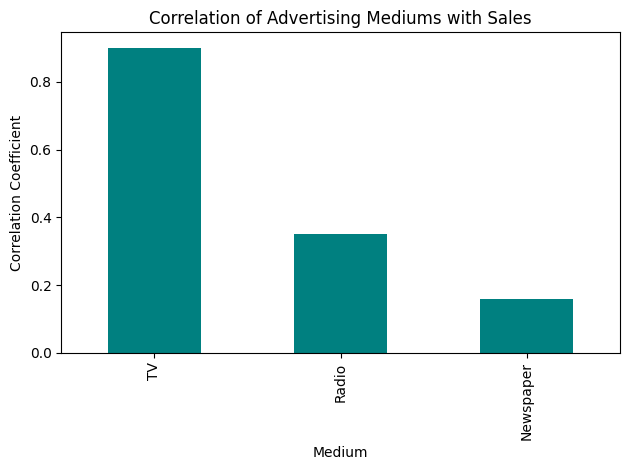

In [48]:
correlation_matrix= dataset[['Radio','TV','Sales','Newspaper']].corr()

#Step 1: Extract correlation of each medium with 'Sales'
medium_corr = correlation_matrix.loc[['TV', 'Radio', 'Newspaper'], 'Sales']

# Step 2: Convert to DataFrame for plotting
df_corr = medium_corr.reset_index()
df_corr.columns = ['Medium', 'Correlation']

# Step 3: Plot
df_corr.plot(x='Medium', y='Correlation', kind='bar', legend=False, color='teal')
plt.title('Correlation of Advertising Mediums with Sales')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('Correlation_Mediums.png')
plt.show()

